In [1]:
import sys
sys.path.insert(0, "/Users/do-hyungkwon/GoogleDrive/git/aiclass/1731095007_dohyungkwon/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
%matplotlib inline
# pip install pygraphviz

In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,# 값을 크게 준다는 것은 값들이 더 넓게 분포한다는 것을 의미. 0.1로 주면 수행 잘 안됨.
    # 왜 특정 초기값을 주어야 학습이 잘 이루어지는것인지 연구가 필요
    # 기준이 뚜렷하지 않음
    # /Users/do-hyungkwon/GoogleDrive/git/aiclass/0.Professor/tensorflux/main/vanilla_multi_layer_test
    # cost function을 벗어나거나 local optima에 빠지거나 하는 등.. 
    # 함수를 설계하기 나름 아닌가? 
    # 시각화할 수 있으면 도움이 좀 되나?
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01
)

In [3]:
# pip install pygraphviz
# n.draw_and_show(figsize=(20, 10))

In [4]:
#data = mnist.MNIST_Data()
data = mnist.MNIST_Data()

In [7]:
forward_final_output = n.feed_forward(input_data=data.test_input)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000 #1000장의 이미지를 뭉탱이로 준다.
n.learning(max_epoch=100, data=data, batch_size=batch_size, print_period=1, verbose=False)#True

forward_final_output = n.feed_forward(input_data=data.test_input)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.9634
Epoch   0 Completed - Train Error: 0.126811 - Validation Error: 0.116170 - Test Accuracy: 0.963400
Epoch   1 Completed - Train Error: 0.114141 - Validation Error: 0.109934 - Test Accuracy: 0.965500
Epoch   2 Completed - Train Error: 0.131455 - Validation Error: 0.104957 - Test Accuracy: 0.967600
Epoch   3 Completed - Train Error: 0.076541 - Validation Error: 0.100777 - Test Accuracy: 0.968200
Epoch   4 Completed - Train Error: 0.067044 - Validation Error: 0.097183 - Test Accuracy: 0.970000
Epoch   5 Completed - Train Error: 0.085843 - Validation Error: 0.094239 - Test Accuracy: 0.971000
Epoch   6 Completed - Train Error: 0.085445 - Validation Error: 0.091722 - Test Accuracy: 0.972000
Epoch   7 Completed - Train Error: 0.067895 - Validation Error: 0.089542 - Test Accuracy: 0.972500
Epoch   8 Completed - Train Error: 0.048455 - Validation Error: 0.087734 - Test Accuracy: 0.973700
Epoch   9 Completed - Train Error: 0.052270 - Validation Error: 0.086157 - Test Accur

Epoch  83 Completed - Train Error: 0.002644 - Validation Error: 0.082155 - Test Accuracy: 0.979300
Epoch  84 Completed - Train Error: 0.003578 - Validation Error: 0.082280 - Test Accuracy: 0.979300
Epoch  85 Completed - Train Error: 0.001923 - Validation Error: 0.082571 - Test Accuracy: 0.979100
Epoch  86 Completed - Train Error: 0.002757 - Validation Error: 0.082700 - Test Accuracy: 0.979000
Epoch  87 Completed - Train Error: 0.002310 - Validation Error: 0.082877 - Test Accuracy: 0.979100
Epoch  88 Completed - Train Error: 0.001929 - Validation Error: 0.083031 - Test Accuracy: 0.979100
Epoch  89 Completed - Train Error: 0.001797 - Validation Error: 0.083235 - Test Accuracy: 0.979200
Epoch  90 Completed - Train Error: 0.002031 - Validation Error: 0.083387 - Test Accuracy: 0.979200
Epoch  91 Completed - Train Error: 0.001662 - Validation Error: 0.083630 - Test Accuracy: 0.979200
Epoch  92 Completed - Train Error: 0.001930 - Validation Error: 0.083759 - Test Accuracy: 0.979200
Epoch  93 

In [ ]:
# validation error가 최소일 때가 가장 좋은 모델이다
# 즉 epoch N번째에서 가장 낮은 validation error를 보이는 것이 가장 좋은 모델이다. 
# 즉 그 에폭에 해당하는 파라미터를 끄집어 와야 한다는 소리다.


# 따라서 위의 그래프에서는 초록색이 최저일 떄 끝났어야 함
# 따라서 에포크마다 파라미터를 저장할 필요가 있음

# 그럼, 왜 갑자기 error가 높아지는건가? 특히 Fashion MNIST에서.



False Prediction Index: 8, Prediction: Six, Ground Truth: Five
False Prediction Index: 62, Prediction: Eight, Ground Truth: Nine
False Prediction Index: 115, Prediction: Nine, Ground Truth: Four
False Prediction Index: 149, Prediction: Four, Ground Truth: Two
False Prediction Index: 151, Prediction: Eight, Ground Truth: Nine


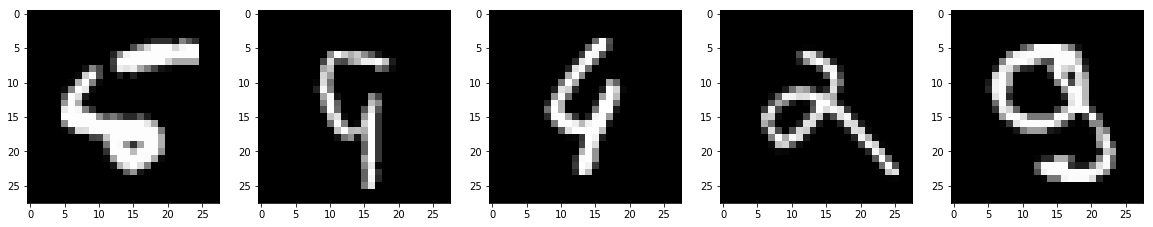

In [10]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))
# cost-learning Accuracy 0.9783
# 틀린 217개 중 다섯개의 이미지 출력